_Source: [Tensorflow Tutorials](https://www.tensorflow.org/tutorials/keras/classification?hl=es-419)_

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles)

Moda MNIST esta construida como un reemplazo para el set de datos clasico [MNIST](http://yann.lecun.com/exdb/mnist/) casi siempre utilizado como el "Hola Mundo" de programas de aprendizaje automatico (ML) para computo de vision. El set de datos de MNIST contiene imagenes de digitos escrito a mano (0, 1, 2, etc.) en un formato identico al de los articulos de ropa que va a utilizar aca.

Esta guia utiliza Moda MNIST para variedad y por que es un poco mas retador que la regular MNIST. Ambos set de datos son relativamente pequenos y son usados para verificar que el algoritmo funciona como debe.

Aca, 60,000 imagenes son usadas para entrenar la red neuronal y 10,000 imagenes son usadas para evaluar que tan exacto aprendia la red a clasificar imagenes. Pueden acceder al set de moda de MNIST directamente desde TensorFlow. Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist # Carga el dataset de fashion mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # Carga los datos de entrenamiento y test

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # Categorias

### Explore el set de datos
Explore el formato de el set de datos antes de entrenar el modelo. Lo siguiente muestra que hay 60,000 imagenes en el set de entrenamiento, con cada imagen representada por pixeles de 28x28:

In [4]:
train_images.shape # Muestra el tamaño de los datos de entrenamiento

(60000, 28, 28)

Asimismo, hay 60,000 etiquetas en el set de entrenamiento:

In [5]:
len(train_labels) # Muestra el numero de etiquetas

60000

Cada etiqueta es un integro entre 0 y 9:

In [6]:
train_labels # Muestra las etiquetas

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Hay 10,000 imagenes en el set de pruebas. Otra vez, cada imagen es representada como pixeles de 28x28:

In [7]:
test_images.shape # Muestra el tamaño de los datos de test

(10000, 28, 28)

In [8]:
len(test_labels) # Muestra el numero de etiquetas

10000

### Pre-procese el set de datos
El set de datos debe ser pre-procesada antes de entrenar la red. Si usted inspecciona la primera imagen en el set de entrenamiento, va a encontrar que los valores de los pixeles estan entre 0 y 255:

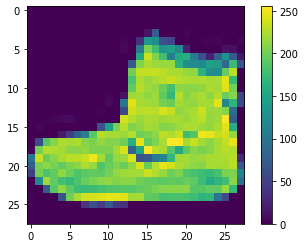

In [9]:
plt.figure() # Crea una figura
plt.imshow(train_images[0]) # Muestra la imagen de entrenamiento
plt.colorbar() # Muestra la barra de color
plt.grid(False) # No muestra la cuadrícula
plt.show() # Muestra la imagen

Escale estos valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacero, divida los valores por 255. Es importante que el training set y el testing set se pre-procesen de la misma forma:

In [10]:
train_images = train_images / 255.0 # Normaliza los datos de entrenamiento entre 0 y 1 para que sean interpretables
test_images = test_images / 255.0 # Normaliza los datos de test entre 0 y 1 para que sean interpretables

Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el training set y despleguemos el nombre de cada clase debajo de cada imagen.

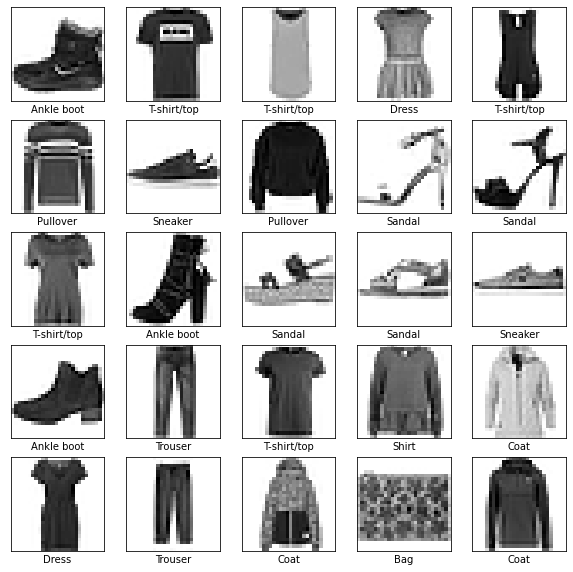

In [11]:
plt.figure(figsize=(10,10)) # Crea una figura de 10x10 px
for i in range(25): # Muestra las imagenes de entrenamiento
    plt.subplot(5,5,i+1) # Crea una subfigura de 5x5 px
    plt.xticks([]) # No muestra las etiquetas de las columnas de la figura de entrenamiento
    plt.yticks([]) # No muestra las etiquetas de las filas de la figura de entrenamiento de entrenamiento
    plt.grid(False) # No muestra la cuadrícula
    plt.imshow(train_images[i], cmap=plt.cm.binary) # Muestra la imagen de entrenamiento
    plt.xlabel(class_names[train_labels[i]]) # Muestra la etiqueta de la imagen de entrenamiento
plt.show() # Muestra la figura

### Construir el Modelo

In [12]:
model = tf.keras.Sequential() # Crea un modelo Sequential
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # Agrega una capa Flatten con una entrada de 28x28
model.add(tf.keras.layers.Dense(128, activation='relu')) # Agrega una capa Dense con 128 neuronas y activacion relu para los pesos 
model.add(tf.keras.layers.Dense(10, activation='softmax')) # Agrega una capa Dense con 10 neuronas y activacion softmax para los pesos

La primera capa de esta red, `tf.keras.layers.Flatten`, transforma el formato de las imagenes de un arreglo bi-dimensional (de 28 por 28 pixeles) a un arreglo uni dimensional (de 28*28 pixeles = 784 pixeles). Observe esta capa como una capa no apilada de filas de pixeles en la misma imagen y alineandolo. Esta capa no tiene parametros que aprender; solo reformatea el set de datos.

Despues de que los pixeles estan "aplanados", la secuencia consiste de dos capas `tf.keras.layers.Dense`. Estas estan densamente conectadas, o completamente conectadas. La primera capa `Dense` tiene 128 nodos (o neuronas). La segunda (y ultima) capa es una capa de 10 nodos _softmax_ que devuelve un arreglo de 10 probabilidades que suman a 1. Cada nodo contiene una calificacion que indica la probabilidad que la actual imagen pertenece a una de las 10 clases.

### Compile el modelo
Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

- _Loss function_ —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.

- _Optimizer_ — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.

- _Metrics_ — Se usan para monitorear los pasos de entrenamiento y de pruebas. El siguiente ejemplo usa accuracy (exactitud) , la fraccion de la imagenes que son correctamente clasificadas.

In [13]:
model.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy', 
            metrics=['accuracy']) # Compila el modelo con un optimizador Adam, una funcion de pérdida sparse_categorical_crossentropy y una metrica de accuracy

In [14]:
model.summary() # Muestra el modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Entrenar el Modelo
Entrenar el modelo de red neuronal requiere de los siguientes pasos:

1. Entregue los datos de entrenamiento al modelo. En este ejemplo , el set de datos de entrenamiento estan en los arreglos `train_images` y `train_labels`.

2. el modelo aprende a asociar imagenes y etiquetas.

3. Usted le pregunta al modelo que haga predicciones sobre un set de datos que se encuentran en el ejemplo,incluido en el arreglo `test_images`. Verifique que las predicciones sean iguales a las etiquetas de el arreglo `test_labels`.

Para comenzar a entrenar, llame el metodo `model.fit`, es llamado asi por que fit (ajusta) el modelo a el set de datos de entrenamiento:

In [15]:
print('Entrenando el modelo...') 
historial = model.fit(train_images, train_labels, epochs=10) # Entrena el modelo con los datos de entrenamiento y 5 epocas de entrenamiento
print('Entrenamiento finalizado')

Entrenando el modelo...
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4968 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3744 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3343 - accuracy: 0.8784
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3114 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2930 - accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2811 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2682 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2569 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2475 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 6

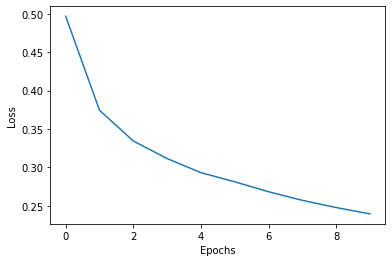

In [16]:
# ver la funcion de perdida
plt.xlabel('Epochs') # Muestra la etiqueta de las columnas
plt.ylabel('Loss') # Muestra la etiqueta de las filas
plt.plot(historial.history['loss']) # Muestra el grafico de la funcion de perdida

### Evaluar Exactitud
Siguente, compare como el rendimiento del modelo sobre el set de datos:

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) # Evalua el modelo con los datos de test y muestra el resultado
print('Test accuracy:', test_acc) # Muestra el resultado

313/313 - 1s - loss: 0.3287 - accuracy: 0.8848 - 829ms/epoch - 3ms/step
Test accuracy: 0.8848000168800354


Resulta que la exactitud sobre el set de datos es un poco menor que la exactitud sobre el set de entrenamiento. Esta diferencia entre el entrenamiento y el test se debe a _overfitting_ (sobre ajuste). Sobre ajuste sucede cuando un modelo de aprendizaje de maquina (ML) tiene un rendimiento peor sobre un set de datos nuevo, que nunca antes ha visto comparado con el de entrenamiento.

### Hacer predicciones
Con el modelo entrenado usted puede usarlo para hacer predicciones sobre imagenes.

In [18]:
predictions = model.predict(test_images) # Predice los datos de test

In [19]:
predictions[0] # Muestra la prediccion de la imagen de test 0

array([3.8938883e-09, 6.5687282e-11, 1.3023924e-09, 1.6440693e-12,
       2.9219107e-09, 8.3783251e-04, 2.4225397e-08, 6.6492786e-03,
       2.4025461e-08, 9.9251282e-01], dtype=float32)

una prediccion es un arreglo de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Ustedes pueden revisar cual tiene el nivel mas alto de confianza:

In [20]:
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])

9
Ankle boot


Entonces,el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de test o de pruebas muestra que esta clasificaion es correcta:

In [21]:
test_labels[0] # Muestra la etiqueta de la imagen de test 0

9

**Grafique** esto para poder ver todo el set de la prediccion de las 10 clases.

In [22]:
def plot_image(i, predictions_array, true_label, img): # Funcion para plotear las imagenes
    predictions_array, true_label, img = predictions_array, true_label[i], img[i] # Obtiene las predicciones, la etiqueta real y la imagen
    plt.grid(False) # No muestra la cuadrícula
    plt.xticks([]) # No muestra las etiquetas de las columnas
    plt.yticks([]) # No muestra las etiquetas de las filas

    plt.imshow(img, cmap=plt.cm.binary) # Muestra la imagen

    predicted_label = np.argmax(predictions_array) # Obtiene la etiqueta predicha
    if predicted_label == true_label: # Si la etiqueta predicha es la misma que la etiqueta real
        color = 'blue' 
    else: 
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color) # Muestra la etiqueta predicha con un color diferente dependiendo de si es correcta o no

def plot_value_array(i, predictions_array, true_label): # Funcion para plotear las etiquetas
    predictions_array, true_label = predictions_array, true_label[i] # Obtiene las predicciones y la etiqueta real
    plt.grid(False) # No muestra la cuadrícula
    plt.xticks(range(10)) # Muestra las etiquetas de las columnas
    plt.yticks([]) # No muestra las etiquetas de las filas
    this_plot = plt.bar(range(10), predictions_array, color="#777777") # Crea una barra con las predicciones
    plt.ylim([0, 1]) # Limita el eje y entre 0 y 1
    predicted_label = np.argmax(predictions_array) # Obtiene la etiqueta predicha

    this_plot[predicted_label].set_color('red') # Si la etiqueta predicha es la misma que la etiqueta real, la barra de la etiqueta predicha cambia de color a rojo
    this_plot[true_label].set_color('blue') # Si la etiqueta predicha es la misma que la etiqueta real, la barra de la etiqueta real cambia de color a azul


Miremos la imagen [0], sus predicciones y el arreglo de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

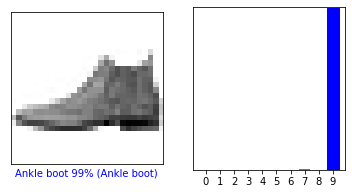

In [23]:
i = 0
plt.figure(figsize=(6,3)) # Crea una figura de 6x3 px
plt.subplot(1,2,1) # Crea una subfigura de 1x2 px
plot_image(i, predictions[i], test_labels, test_images) # Muestra la imagen de test 0
plt.subplot(1,2,2) # Crea una subfigura de 1x2 px
plot_value_array(i, predictions[i], test_labels) # Muestra la etiqueta de test 0
plt.show() # Muestra la figura

In [32]:
print(np.argmax(predictions[12]), class_names[np.argmax(predictions[12])])
print(test_labels[12])

5 Sandal
7


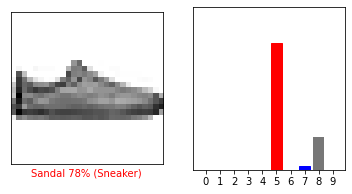

In [25]:
i = 12
plt.figure(figsize=(6,3)) # Crea una figura de 6x3 px
plt.subplot(1,2,1) # Crea una subfigura de 1x2 px
plot_image(i, predictions[i], test_labels, test_images) # Muestra la imagen de test 12
plt.subplot(1,2,2) # Crea una subfigura de 1x2 px
plot_value_array(i, predictions[i], test_labels) # Muestra la etiqueta de test 12
plt.show() # Muestra la figura

Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

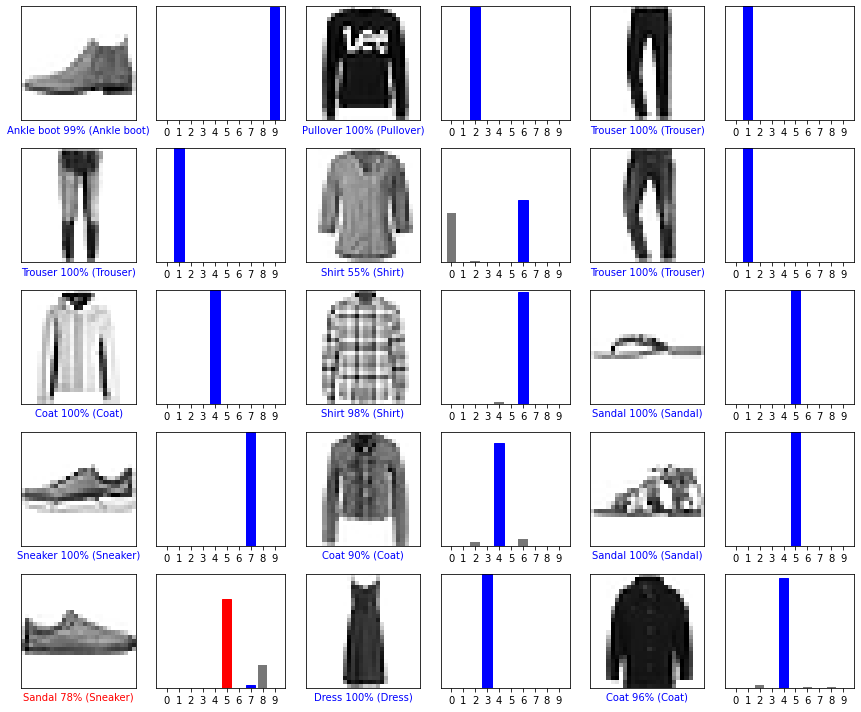

In [26]:
# Traza las primeras X imágenes de prueba, sus etiquetas predichas y las etiquetas verdaderas.
# Colorea las predicciones correctas en azul y las incorrectas en rojo.
num_rows = 5 
num_cols = 3
num_images = num_rows*num_cols # Numero de imagenes a mostrar
plt.figure(figsize=(2*2*num_cols, 2*num_rows)) 
for i in range(num_images): 
    plt.subplot(num_rows, 2*num_cols, 2*i+1) 
    plot_image(i, predictions[i], test_labels, test_images) # Muestra la imagen de test i
    plt.subplot(num_rows, 2*num_cols, 2*i+2) 
    plot_value_array(i, predictions[i], test_labels) # Muestra la etiqueta de test i
plt.tight_layout() # Ajusta los espacios entre las subfiguras
plt.show() # Muestra la figura

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [27]:
img = test_images[1] # Obtiene la imagen de test 1
print(img.shape) # Muestra el tamaño de la imagen

(28, 28)


Los modelos de `tf.keras` son optimizados sobre batch o bloques, o coleciones de ejemplos por vez. De acuerdo a esto, aunque use una unica imagen toca agregarla a una lista:

In [28]:
# Añade la imagen a un batch en el que sea el único miembro.
img = (np.expand_dims(img,0)) # Añade la imagen a un batch en el que sea el único miembro
print(img.shape) # Muestra el tamaño de la imagen

(1, 28, 28)


Ahora prediga la etiqueta correcta para esta imagen:

In [29]:
predictions_single = model.predict(img) # Predice la imagen
print(predictions_single) # Muestra las predicciones

[[1.4056244e-05 4.1560037e-12 9.9910730e-01 3.6426165e-13 7.0453389e-04
  1.2702318e-09 1.7416132e-04 1.2144307e-13 1.0367216e-08 2.2060057e-14]]


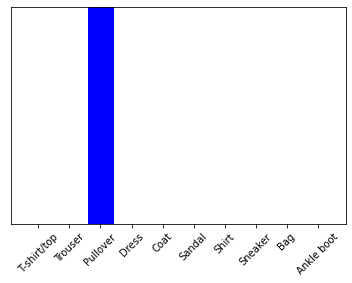

In [30]:
# Muestra la imagen y las predicciones
plot_value_array(1, predictions_single[0], test_labels)# Muestra la etiqueta de test 1
_ = plt.xticks(range(10), class_names, rotation=45) # Muestra las etiquetas de las columnas

In [31]:
np.argmax(predictions_single[0]) # Muestra la etiqueta predicha

2